In [77]:
## Ziyu
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt
import re
re.compile('<title>(.*)</title>')
global data_list

def c5read(fname):

    global data_list
    global xdim
    global ydim

    data_list=[]
    f=open(fname,'r')
    print ("Reading file...")
    for line in f:
        if line[0:2]=='XC':
            xdim=int(line.split()[1])   
            print ('xdim=',xdim)
            
        if line[0:2]=='YC':
            ydim=int(line.split()[1])
            print ('ydim=',ydim)
                 
        if re.match('\d\s',line) != None: 
            if int(line.split()[0]) == 1:
                eulers=line.split()[5:8] 
                for x in range(len(eulers)):
                    eulers[x]=float(eulers[x])
                data_list.append(np.array(eulers))
            else:
                eulers=line.split()[5:8]
                for x in range(len(eulers)):
                    eulers[x]=float('0.0')
                data_list.append(np.array(eulers)) 
    f.close()
    
    Angles=[360,60,90]
    RGB=[256,256,256]
    
    #For creating an array from the list and changing the eulers to RGB value 
    emap=np.array(data_list)/Angles*RGB
    emap=emap.reshape(ydim,xdim,3) 
    
    # For imshow the RGB value has to be float between 0-1 or int between 0-255 
    # changing the float type to int type then plot the image 
    emap=emap.astype(np.int)
    
    print ("Done!")
    plt.imshow(emap)

Reading file...
xdim= 140
ydim= 400
Done!


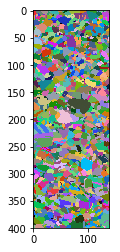

In [47]:
## Ziyu
c5read("Desktop\\Nickel.ctf")

In [41]:
## Elliot
# E_angs are the Eular angles 

E_angs = [3,4,5] #test
def G_Matrix(E_angs):
    # The G-Matrix is a rotation Matrix that descibes rotation from a refernce plane. Appyling the G_matrix is the same rotation/orientation as the that defined by the Eualr angles.
    # This function converts the Eular angle rotation into a G_matrix rotation 
    
    theta1 = np.radians(E_angs[0])
    THETA1 = np.radians(E_angs[1])
    theta2 = np.radians(E_angs[2])
    
    g11 = (np.cos(theta1)*np.cos(theta2))-(np.sin(theta1)*np.sin(theta2)*np.cos(THETA1))
    g12 = (np.sin(theta1)*np.cos(theta2))+(np.sin(theta2)*np.cos(theta1)*np.cos(THETA1))
    g13 = np.sin(theta2)*np.sin(THETA1)

    g21 = (-np.cos(theta1)*np.sin(theta2))-(np.sin(theta1)*np.cos(theta2)*np.cos(THETA1))
    g22 = (-np.sin(theta1)*np.sin(theta2))+(np.cos(theta1)*np.cos(theta2)*np.cos(THETA1))
    g23 = np.cos(theta2)*np.sin(THETA1)

    g31 = np.sin(theta1)*np.sin(THETA1)
    g32 = -np.cos(theta1)*np.sin(THETA1)
    g33 = np.cos(THETA1)
    
    G = ([[g11,g12,g13],[g21,g22,g23],[g31,g32,g33]])
    return G

In [42]:
## Elliot
def FamilyPlaneCubic(plane):
    # holds all the rotation planes of symmetry for the cubic system.
   
    global familyplane
    global FamilyPlane
    
    
    FamilyPlane = []
    familyplane = []
    
    FamilyPlane.append([[1,0,0],[0,1,0],[0,0,1]])
    FamilyPlane.append([[1,0,0], [0,-1,0], [0,0,-1]])
    FamilyPlane.append([[-1,0,0], [0,1,0], [0,0,-1]])
    FamilyPlane.append([[-1,0,0],[0,-1,0],[0,0,1]])
    FamilyPlane.append([[0,1,0],[0,0,1],[1,0,0]])
    FamilyPlane.append([[0,1,0],[0,0,-1],[-1,0,0]])
    FamilyPlane.append([[0,-1,0],[0,0,1],[-1,0,0]])
    FamilyPlane.append([[0,-1,0],[0,0,-1],[1,0,0]])
    FamilyPlane.append([[0,0,1],[1,0,0],[0,1,0]])
    FamilyPlane.append([[0,0,-1],[1,0,0],[0,-1,0]])
    FamilyPlane.append([[0,0,-1],[-1,0,0],[0,1,0]])
    FamilyPlane.append([[0,0,1],[-1,0,0],[0,-1,0]])
    FamilyPlane.append([[1,0,0],[0,0,1],[0,-1,0]])
    FamilyPlane.append([[0,0,-1],[0,1,0],[1,0,0]])
    FamilyPlane.append([[0,1,0],[-1,0,0],[0,0,1]])
    FamilyPlane.append([[1,0,0],[0,0,-1],[0,1,0]])
    FamilyPlane.append([[0,0,1],[0,1,0],[-1,0,0]])
    FamilyPlane.append([[0,-1,0],[1,0,0],[0,0,1]])
    FamilyPlane.append([[0,1,0],[1,0,0],[0,0,-1]])
    FamilyPlane.append([[0,-1,0],[-1,0,0],[0,0,-1]])
    FamilyPlane.append([[0,0,1],[0,-1,0],[1,0,0]])
    FamilyPlane.append([[-1,0,0],[0,0,1],[0,1,0]])
    FamilyPlane.append([[0,0,-1],[0,-1,0],[-1,0,0]])
    FamilyPlane.append([[-1,0,0],[0,0,-1],[0,-1,0]])
    
    #multiples the the symmetry rotations by the reference plane input by the user 
    
    for n in range(len(FamilyPlane)):
        familyplane.append(np.matmul(plane,FamilyPlane[n]))
    
    # After you have run the function you can use the variable familyplane which is a list of 3x1 vectors 
    return[familyplane]

In [43]:
## Mark
FamilyPlaneCubic([1,1,1]) # Using [111] here, this may be changed. Output is 24 rotations of this direction.


G_Data=[] #Creates a new list of all Euler angles put through the G_Matrix function.
for p in range(len(data_list)):
    G_Data.append(G_Matrix(data_list[p]))

    
coordinate=[] # Creates a list to hold all the values of a once converted to macroscopic directions
for i in range(len(G_Data)):   
    for j in range(len(familyplane)):
        coordinate.append(np.matmul(G_Data[i],familyplane[j])/np.linalg.norm((np.matmul(G_Data[i],familyplane[j])),2))
# Multiplies each 3x1 section of a by the inverse of the g matrix to calculate the macroscopic co-ordinate. This is divided by its norm (or length) to create a unit vector.

In [75]:
print(len(G_Data))
print(len(familyplane))
print(len(coordinate))
print(len(data_list))

56000
24
1344000
56000


(-1.100000180564099,
 1.0993347150920751,
 -1.0980375051806777,
 1.098946500097267)

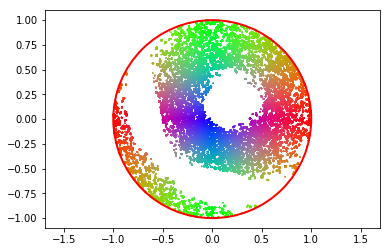

In [73]:
##Mark + Paul
counter=0
c=0

for q in range(len(coordinate)):
    if coordinate[q][2]>=0:
        counter=counter+1
        
XY=np.zeros(shape=(counter,2)) # Creates array to put values into within the list
RGB=np.zeros(shape=(counter,3))

for q in range(len(coordinate)):
    if coordinate[q][2]>=0:
        XY[c][0]=coordinate[q][0]/((coordinate[q][2]+1)) # Calculates the x and y co-ordinates for the stereographic plot and creates a matrix to hold them (XY).
        XY[c][1]=coordinate[q][1]/((coordinate[q][2]+1))
        RGB[c][0]=abs(coordinate[q][0])
        RGB[c][1]=abs(coordinate[q][1])
        RGB[c][2]=abs(coordinate[q][2])
        c=c+1
        
fig1, ax1=plt.subplots()
ax1.scatter(XY[:,0],XY[:,1],color=RGB,s=0.1)
circle1=plt.Circle((0,0),1,color='r',fill=False,linewidth=2)
plt.gcf().gca().add_artist(circle1)
plt.axis('equal')               
# Output is a list of XY co-ordinates to be plotted on the sterographic projection

(-0.999558148890933,
 0.9988926834189091,
 -0.9974474348720824,
 0.9983564297886716)

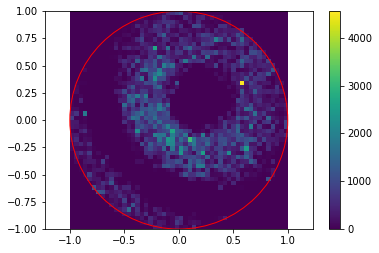

In [58]:
ax.set_aspect(aspect=1)

x = XY[:, 0]
y = XY[:, 1]

fig2, ax2=plt.subplots()
ax2.hist2d(XY[:, 0], XY[:, 1],bins=(50,50))
plt.colorbar(h[3])
circle1=plt.Circle((0,0),1,color='r',fill=False)
plt.gcf().gca().add_artist(circle1)
ax2.axis('equal')

-1.1994032321219172 1.1987377666498933 -1.1970278213381578 1.197936816254747


Text(0.5,1,'2D Gaussian Kernel density estimation')

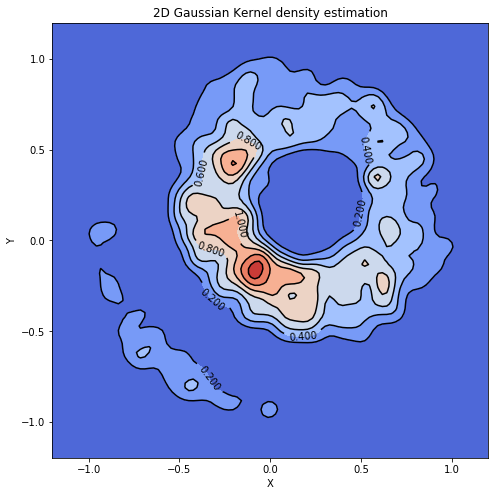

In [33]:
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

In [ ]:
## Elliot
# A is the postion that is being measureb, B is the postion to the right, C is the postion below xdim is the number of points along the x axis thus the point below is xdim away in data_list
x = 1
A_angs = data_list[x]
B_angs = data_list[x+1]
C_angs = data_list[x+(xdim-1)]

# uses the G_matrix function on the assoaciated Eular angles 
GA = G_Matrix(A_angs)
GB = G_Matrix(B_angs) 
GC = G_Matrix(C_angs)

# want to calculate a matrix which will describe a rotation from oriehtnation b and c to orientation a. To go from b to a first must inverse b then apply a 
# np.matmul = matrix multiplication
# np.linalg.inv = inverse of of matrix
GA_B = np.matmul(np.linalg.inv(GB),GA)
GA_C = np.matmul(np.linalg.inv(GC),GA)

# need to multiply the rotation from a to b&c by the family of symmetry rotations for the system

GA_B_PF = []
GA_C_PF = []
for n in range(len(familyplane)): 
    GA_B_PF.append(np.matmul(GA_B,familyplane[n]))
    GA_C_PF.append(np.matmul(GA_B,familyplane[n]))

In [34]:
print(emap)

NameError: name 'emap' is not defined